In [33]:
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')
# %matplotlibinline
def getSpecificLocation(train,intersection_id,tollgate_id,start_time,end_time,start_clock=None,end_clock=None):
    temp = train.copy()
    temp.index = temp['start_time']
    temp = temp[temp['intersection_id'] == intersection_id ]
    SpecficData = temp[temp['tollgate_id'] == tollgate_id]
#     try :
    if start_time !=None and end_time != None:
        SpecficData = temp[start_time:end_time]
        return SpecficData
    if start_clock !=None and end_clock != None:
        temp['start_clock'] = pd.to_datetime(temp['start_clock'])
        temp['start_clock'] = temp['start_clock']
        temp.index = temp['start_clock']
        start_clock=pd.to_datetime(start_clock)
        start_clock = start_clock.time
        end_clock=pd.to_datetime(end_clock)
        end_clock = end_clock.time
        SpecficData = temp[start_clock:end_clock]
        return SpecficData
#     except:
#         print "please start and end are correct!!!!"
def showCurve(train,intersection_id,tollgate_id,start_time,end_time):
    a = getSpecificLocation(train,intersection_id,tollgate_id,start_time,end_time)
    a.plot(x='start_time',y='avg_travel_time',kind = 'line',marker='*',figsize=[24,10],grid=True)

def CompareAllDataInSamePeriod(train,start_time,end_time):
    fig, (axis2,axis3,axis4,axis6,axis7,axis9) = plt.subplots(6,1,figsize=(30,30),)

    a = getSpecificLocation(train,1,2,start_time=start_time,end_time=end_time)
    if(a.empty == False):
        a.plot(x='start_time',y='avg_travel_time',ax=axis2,kind = 'line',marker='o',grid=True,title='1,2')
    a = getSpecificLocation(train,1,3,start_time=start_time,end_time=end_time)
    if(a.empty == False):
        a.plot(x='start_time',y='avg_travel_time',ax=axis3,kind = 'line',marker='o',grid=True,title='1,3')
    a = getSpecificLocation(train,2,1,start_time=start_time,end_time=end_time)
    if(a.empty == False):
        a.plot(x='start_time',y='avg_travel_time',ax=axis4,kind = 'line',marker='o',grid=True,title='2,1')
    a = getSpecificLocation(train,2,3,start_time=start_time,end_time=end_time)
    if(a.empty == False):
        a.plot(x='start_time',y='avg_travel_time',ax=axis6,kind = 'line',marker='o',grid=True,title='2,3')
    a = getSpecificLocation(train,3,1,start_time=start_time,end_time=end_time)
    if(a.empty == False):
        a.plot(x='start_time',y='avg_travel_time',ax=axis7,kind = 'line',marker='o',grid=True,title='3,1')
    a = getSpecificLocation(train,3,3,start_time=start_time,end_time=end_time)
    if(a.empty == False):
        a.plot(x='start_time',y='avg_travel_time',ax=axis9,kind = 'line',marker='o',grid=True,title='3,3')
    plt.show()
##截取需要的训练数据
import datetime
# get all date list ,check out which date are missing
def get_date_list(start, end, toFormat):
    date_list = []
    date = datetime.datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
    end = datetime.datetime.strptime(end, '%Y-%m-%d %H:%M:%S')
    while date <= end:
        date_list.append(date.strftime(toFormat))
        date = date + datetime.timedelta(minutes=20)
    return date_list

def get_time_list(start, end, toFormat):
    date_list = []
    date = datetime.datetime.strptime(start, '%H:%M:%S')
    end = datetime.datetime.strptime(end, '%H:%M:%S')
    while date <= end:
        date_list.append(date.strftime(toFormat))
        date = date + datetime.timedelta(minutes=20)
    return date_list

def get_index(all_list, to_get_list):
    index = []
    for i in to_get_list:
        index.append(all_list.index(i))
    return index
train = pd.read_csv("C:/Users/Administrator/PycharmProjects/Traffic/Data/training_20min_avg_travel_time-Copy1.csv")
alltime = get_date_list('2016-07-19 00:00:00', '2016-10-18 00:00:00','%Y-%m-%d %H:%M:%S')
# 产生alltime 的df，用于扩展原数据，得到完整的数据集
alltime = pd.DataFrame(alltime)
alltime.rename(columns={0:'start_time'},inplace=True)
alltime['start_time'] = pd.to_datetime(alltime['start_time'])
IntegerData = pd.DataFrame({'intersection_id':[],'tollgate_id':[],'start_time':[],'avg_travel_time':[]})

# solit time window into start time and  end time
train['start_time'] = train['time_window'].apply(lambda x :(x.split(','))[0][1:])
train['start_time'] = pd.to_datetime(train['start_time'])
# train['end_time'] = train['time_window'].apply(lambda x :(x.split(','))[1][:-1])
train.drop(['time_window'],axis=1,inplace=True)
# 整合数据，总共6553*6 条数据
for intersection_id,intersection_id_group in train.groupby(['intersection_id']):
    for tollgate_id_id,tollgate_id_id_group in intersection_id_group.groupby(['tollgate_id']):
        print intersection_id,tollgate_id_id
        temp = alltime.merge(tollgate_id_id_group,how='outer')
        temp['intersection_id'] = intersection_id
        temp['tollgate_id'] =tollgate_id_id
        IntegerData = IntegerData.merge(temp,how='outer')
# Turn A,B,C to 1,2,3
IntegerData.replace('B',2,inplace=True)
IntegerData.replace('A',1,inplace=True)
IntegerData.replace('C',3,inplace=True)
IntegerData['hour'] = IntegerData['start_time'].apply(lambda x:x.hour)
High6 = IntegerData[IntegerData['hour'] >= 6]
MorningData = High6[High6['hour'] <= 9]
High15 = IntegerData[IntegerData['hour'] >= 15]
NoonData = High15[IntegerData['hour'] <= 18]

A 2
A 3
B 1
B 3
C 1
C 3


d:\python64\lib\site-packages\ipykernel\__main__.py:110: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [1]:
def DrawEachPic(NoonData,Exceptexeption = False):
    for intersection_id,intersection_id_group in NoonData.groupby(['intersection_id']):
        for tollgate_id,tollgate_id_group in intersection_id_group.groupby(['tollgate_id']):
            a = tollgate_id_group.copy()
            a['dayofyear'] = a['start_time'].apply(lambda x:x.dayofyear)
            a['time'] = a['start_time'].apply(lambda x:x.time())
            a.drop(['intersection_id','tollgate_id','start_time'],axis=1,inplace=True)
            a.index = a.time
            a.drop(['hour'],inplace=True,axis=1)
            d = pd.DataFrame({})
            title = "intersection_id:"+intersection_id.astype(str)+"  "+"tollgate_id:"+tollgate_id.astype(str)
            for dayofyear ,group in a.groupby(["dayofyear"]):
                d[dayofyear] = group['avg_travel_time']
        #      填充缺省。。。。。。。这里直接用pad
            d.plot(legend=False,title=title)
            plt.show()

In [2]:
DrawEachPic(NoonData)

NameError: name 'NoonData' is not defined

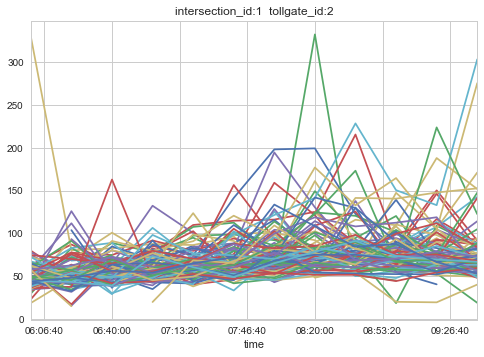

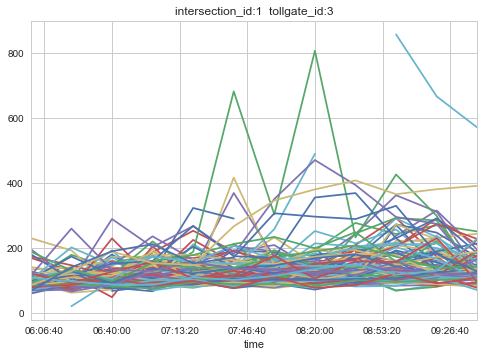

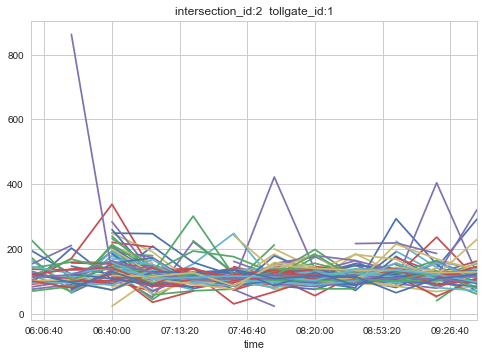

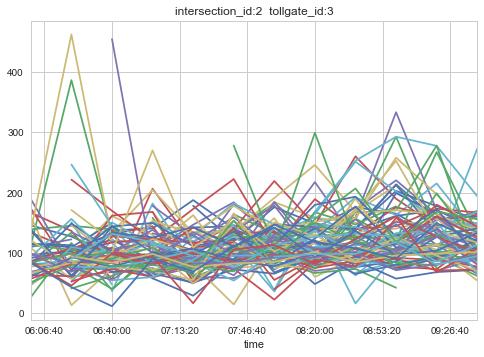

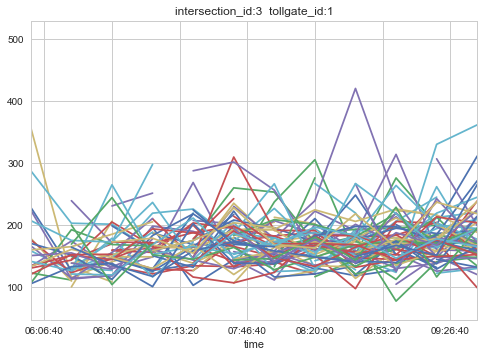

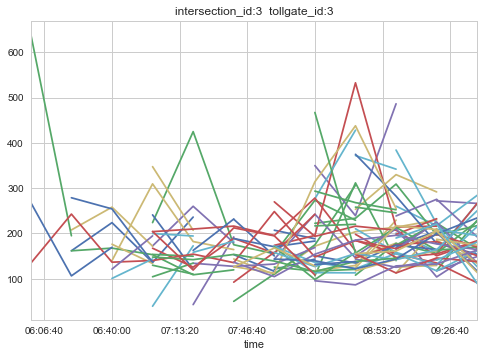

In [36]:
DrawEachPic(MorningData)

In [37]:
# 注意：给出的数据里面包含了10.1国庆，而预测的日期里面并没有节日。这里需要剔除比较异常的天数，得到比较平缓的数据。

In [ ]:
def ExceptOutlier(ts_list):
    Mean = pd.DataFrame([np.mean(i) for i in ts_list])
    mean_low = Mean > Mean.quantile(0.1)
    mean_up = Mean < Mean.quantile(0.9)
    TF = TrueFalseListCombine(mean_low.values,mean_up.values)
    mean_index = Mean[TF].index.values    
    Std = pd.DataFrame([np.std(i) for i in ts_list])
    std_low = Std > Std.quantile(0.1)
    std_up = Std < Std.quantile(0.9)
    TF = TrueFalseListCombine(std_low.values,std_up.values)
    std_index = Std[TF].index.values  
    valid_index = list(set(mean_index)&set(std_index))
    return valid_index

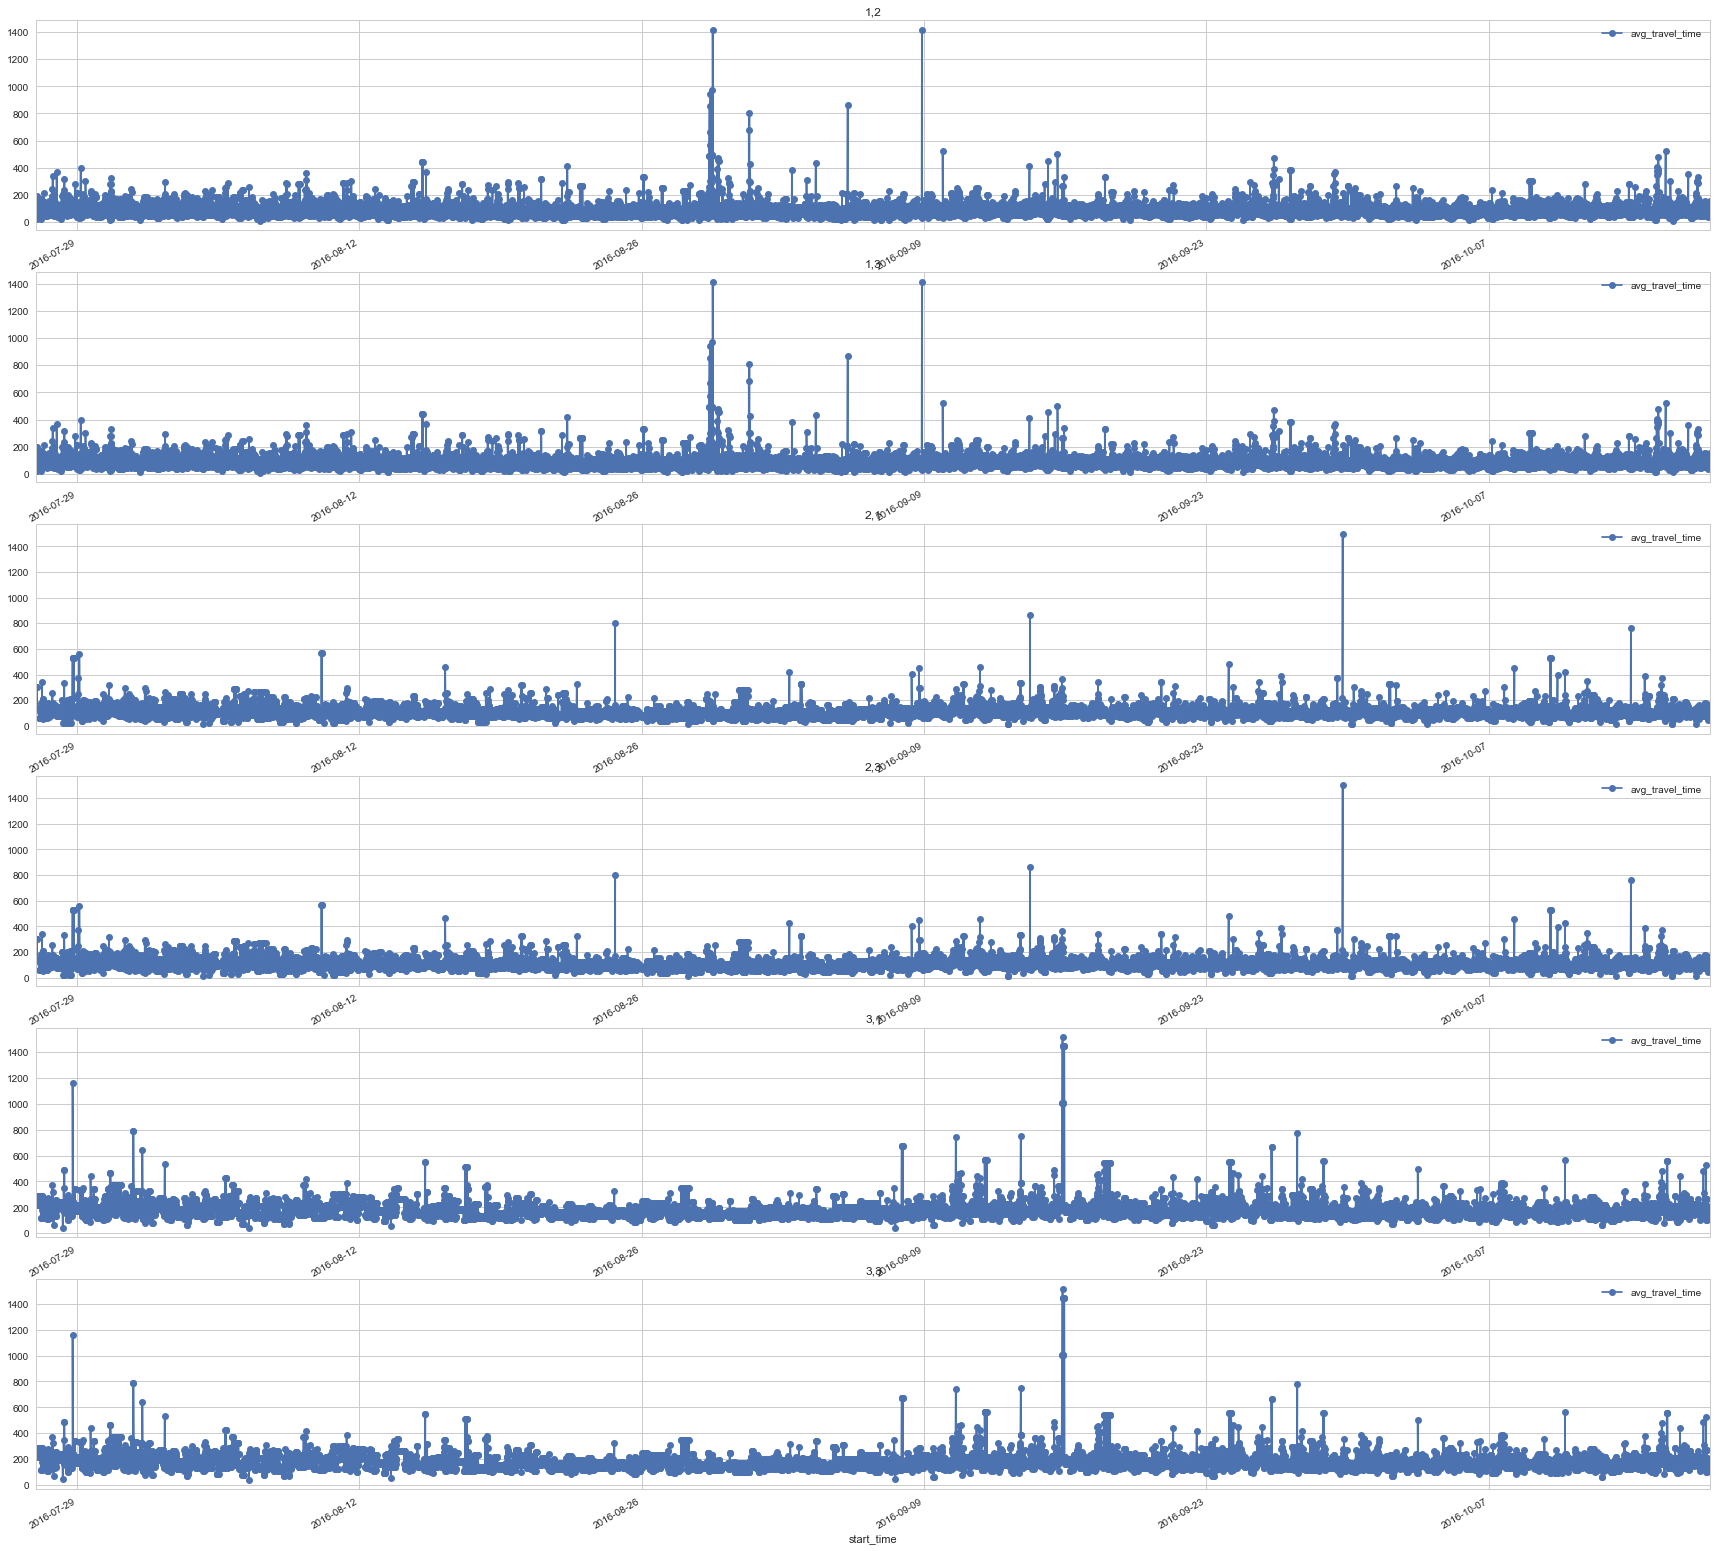

In [35]:
start_time='2016-07-27 00:00:00'
end_time='2016-10-18 00:00:00'
Ind = IntegerData.fillna(method='pad')
CompareAllDataInSamePeriod(Ind,start_time,end_time)